# Imports

In [2]:
import pandas as pd
import country_converter as coco

# Data Cleaning

In [3]:
df = pd.read_csv('ds_salaries.csv')
df

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [4]:
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [5]:
df = df.drop('Unnamed: 0', axis=1)

dfc = df.dropna(axis=0, how='any')

In [6]:
df.experience_level = df.experience_level.replace(['EX', 'SE', 'MI', 'EN'], ['Executivo', 'Senior', 'Pleno', 'Junior'])
df.employment_type = df.employment_type.replace(['FT', 'PT', 'CT', 'FL'], ['Efetivado', 'Estágio', 'CLT', 'Freelance'])
df.company_size = df.company_size.replace(['L', 'M', 'S'], ['Grande', 'Média', 'Pequena'])
df.remote_ratio = df.remote_ratio.replace([100, 50 , 0], ['Remoto', 'Híbrido', 'Presencial'])

In [7]:
df['employee_residence'] = coco.convert(names=df.employee_residence, to='name_official')
df['company_location'] = coco.convert(names=df.company_location, to='name_official')


In [8]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Pleno,Efetivado,Data Scientist,70000,EUR,79833,Federal Republic of Germany,Presencial,Federal Republic of Germany,Grande
1,2020,Senior,Efetivado,Machine Learning Scientist,260000,USD,260000,Japan,Presencial,Japan,Pequena
2,2020,Senior,Efetivado,Big Data Engineer,85000,GBP,109024,United Kingdom of Great Britain and Northern I...,Híbrido,United Kingdom of Great Britain and Northern I...,Média
3,2020,Pleno,Efetivado,Product Data Analyst,20000,USD,20000,Republic of Honduras,Presencial,Republic of Honduras,Pequena
4,2020,Senior,Efetivado,Machine Learning Engineer,150000,USD,150000,United States of America,Híbrido,United States of America,Grande
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,Senior,Efetivado,Data Engineer,154000,USD,154000,United States of America,Remoto,United States of America,Média
603,2022,Senior,Efetivado,Data Engineer,126000,USD,126000,United States of America,Remoto,United States of America,Média
604,2022,Senior,Efetivado,Data Analyst,129000,USD,129000,United States of America,Presencial,United States of America,Média
605,2022,Senior,Efetivado,Data Analyst,150000,USD,150000,United States of America,Remoto,United States of America,Média


In [9]:
df.describe()

,work_year,salary,salary_in_usd
count,607.000000,6.070000e+02,607.000000
mean,2021.405272,3.240001e+05,112297.869852
std,0.692133,1.544357e+06,70957.259411
min,2020.000000,4.000000e+03,2859.000000
25%,2021.000000,7.000000e+04,62726.000000
50%,2022.000000,1.150000e+05,101570.000000
75%,2022.000000,1.650000e+05,150000.000000
max,2022.000000,3.040000e+07,600000.000000


In [8]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

# EXPLORATORY DATA ANALYSIS

In [9]:
import seaborn as sns
import plotly.express as px
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 8)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [10]:
df1 = df[['experience_level', 'job_title', 'salary_in_usd', 'work_year']]

print(df1.head())

  experience_level                   job_title  salary_in_usd  work_year
0            Pleno              Data Scientist          79833       2020
1           Senior  Machine Learning Scientist         260000       2020
2           Senior           Big Data Engineer         109024       2020
3            Pleno        Product Data Analyst          20000       2020
4           Senior   Machine Learning Engineer         150000       2020


In [11]:
fig = px.box(df1, x='experience_level', y='salary_in_usd', labels={"experience_level": "Nível de senioridade", "salary_in_usd": "Salário por ano (U$D)"}, title='Salário por ano por nível de experiência')
fig.show()

In [12]:
year = df.work_year.value_counts().sort_values(ascending=True)
year

2020     72
2021    217
2022    318
Name: work_year, dtype: int64

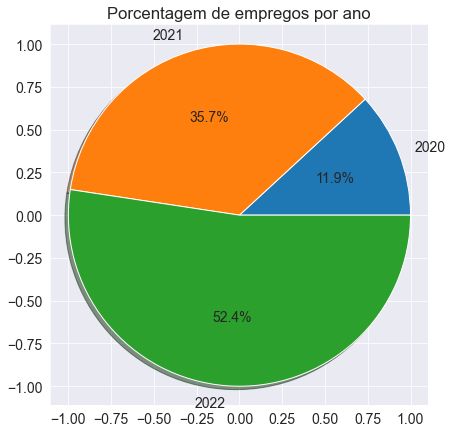

In [13]:
year = np.array(df['work_year'].value_counts(sort=False))

labels = ['2020', '2021', '2022']

plt.figure(figsize=(7,7))
plt.pie(year, labels=labels, autopct='%1.1f%%', shadow=True, frame=True)
plt.title('Porcentagem de empregos por ano')
plt.show()

Text(0.5, 1.0, 'O salário mediano por ano em dólares')

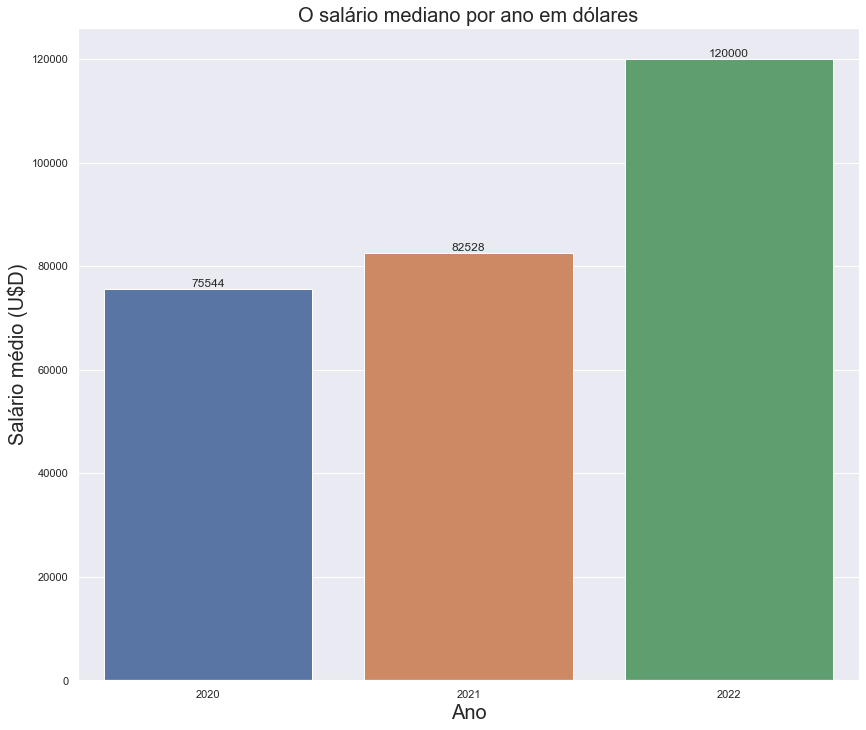

In [14]:
sns.set()
year_salary_usd = df[['work_year', 'salary_in_usd']]
year_salary_usd =year_salary_usd.groupby('work_year').median()['salary_in_usd'].sort_values().reset_index()
fig = plt.figure(figsize=(14,12))
g = sns.barplot(x='work_year', y='salary_in_usd', data=year_salary_usd, ci=None)
g.bar_label(g.containers[0], rotation=0)
plt.ylabel('Salário médio (U$D)', size=20)
plt.xlabel('Ano', size=20)
plt.xticks(rotation=0)
plt.title('O salário mediano por ano em dólares', size=20)

In [15]:
exp = df.experience_level.value_counts()
exp

Senior       280
Pleno        213
Junior        88
Executivo     26
Name: experience_level, dtype: int64

Text(0.5, 1.0, 'Número de trabalhadores por nível de senioridade')

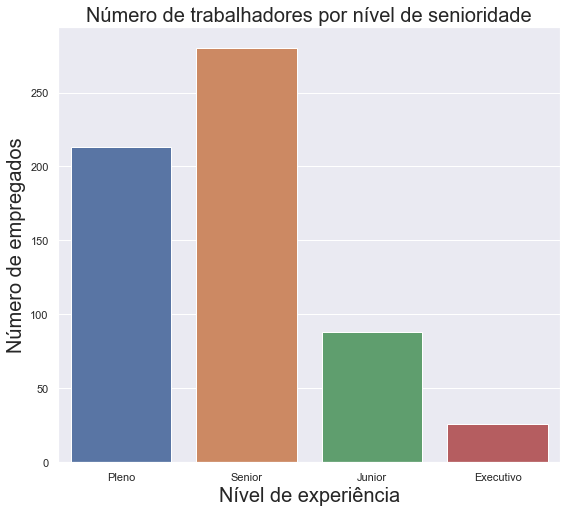

In [16]:
sns.countplot(x='experience_level', data=df)
plt.xlabel('Nível de experiência', size=20)
plt.ylabel('Número de empregados', size=20)
plt.xticks(rotation=0)
plt.title('Número de trabalhadores por nível de senioridade', size=20)

Text(0.5, 1.0, 'Salário mediano(U$D) por nível de senioridade')

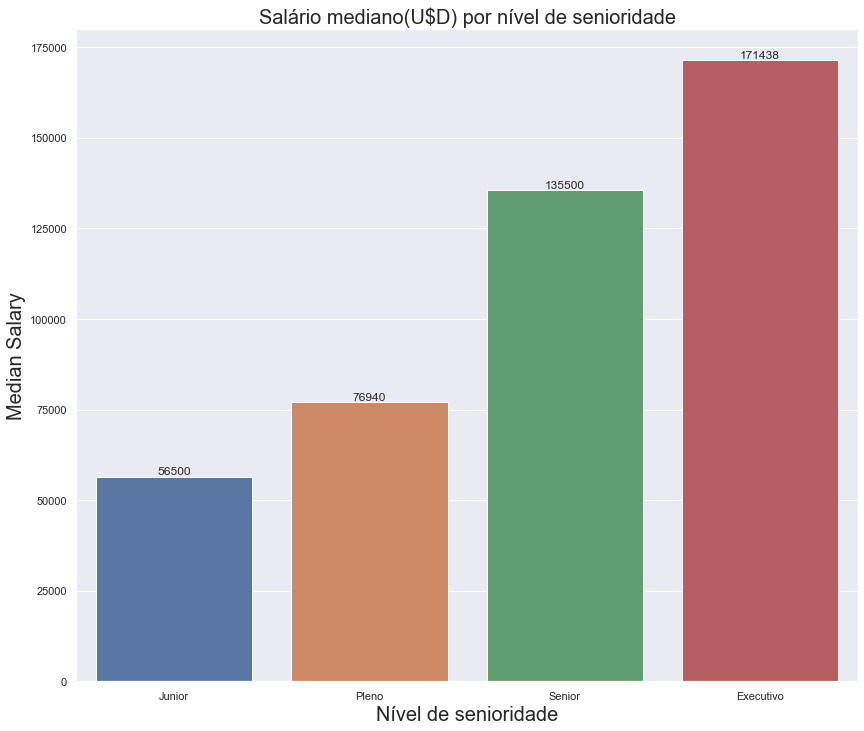

In [17]:
sns.set()
experience_salary = df[['experience_level', 'salary_in_usd']]
experience_salary = experience_salary.groupby('experience_level').median()['salary_in_usd'].sort_values().reset_index()
fig = plt.figure(figsize=(14,12))
g=sns.barplot(x='experience_level', y='salary_in_usd', data=experience_salary, ci=None)
g.bar_label(g.containers[0], rotation=0)
plt.ylabel('Median Salary', size=20)
plt.xlabel('Nível de senioridade', size=20)
plt.xticks(rotation=0)

plt.title('Salário mediano(U$D) por nível de senioridade', size=20)

In [18]:
emp = df.employment_type.value_counts()
emp

Efetivado    588
Estágio       10
CLT            5
Freelance      4
Name: employment_type, dtype: int64

Text(0.5, 1.0, 'Número de trabalhadores por tipo de contratação')

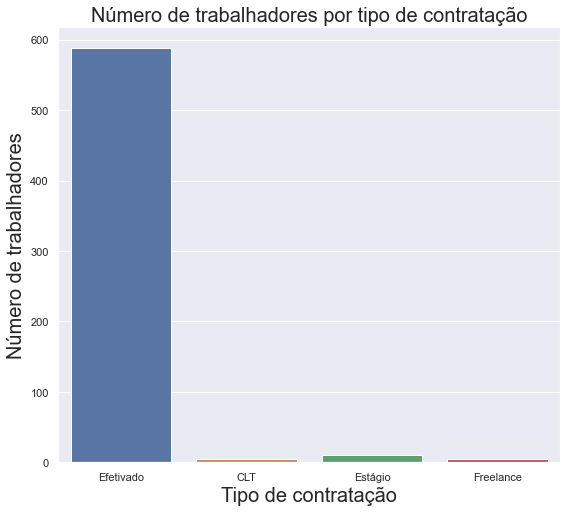

In [19]:
sns.countplot(x='employment_type', data=df)
plt.ylabel('Número de trabalhadores', size=20)
plt.xlabel('Tipo de contratação', size=20)
plt.xticks(rotation=0)
plt.title('Número de trabalhadores por tipo de contratação', size=20)

In [20]:
df3 = df[['salary_in_usd', 'job_title', 'company_location', 'remote_ratio']]

In [21]:
fig3 = px.box(df3, y='salary_in_usd', x='remote_ratio', labels={"salary_in_usd": "Salary per Year (U$D)", "remote_ratio": "Work Regime"})
fig3.show()

Text(0.5, 1.0, 'Distribuição de empregados por posição')

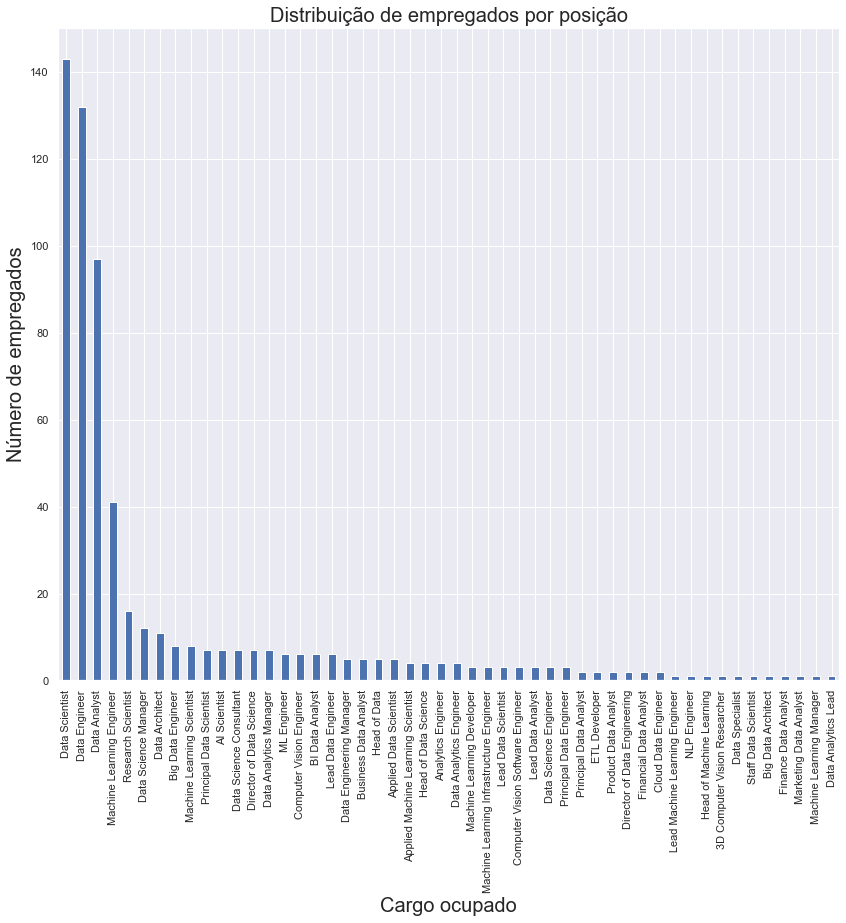

In [22]:
title = df.job_title.value_counts()
title.plot.bar(figsize=(14,12))
plt.ylabel('Número de empregados', size=20)
plt.xlabel('Cargo ocupado', size=20)
plt.title('Distribuição de empregados por posição', size=20)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 [Text(0, 0, '3D Computer Vision Researcher'),
  Text(1, 0, 'Product Data Analyst'),
  Text(2, 0, 'Computer Vision Engineer'),
  Text(3, 0, 'NLP Engineer'),
  Text(4, 0, 'Big Data Engineer'),
  Text(5, 0, 'AI Scientist'),
  Text(6, 0, 'ETL Developer'),
  Text(7, 0, 'Applied Machine Learning Scientist'),
  Text(8, 0, 'Machine Learning Infrastructure Engineer'),
  Text(9, 0, 'Data Science Engineer'),
  Text(10, 0, 'Finance Data Analyst'),
  Text(11, 0, 'Data Analytics Engineer'),
  Text(12, 0, 'ML Engineer'),
  Text(13, 0, 'Business Data Analyst'),
  Text(14, 0, 'Research Scientist'),
  Text(15, 0, 'BI Data Analyst'),
  Text(16, 0, 'Data Science Consultant'),
  Text(17, 0, 'Machine Learning Developer'),
  Text(18, 0, 'Head of Machine Learning'),
  Text(19, 0, 'Lead 

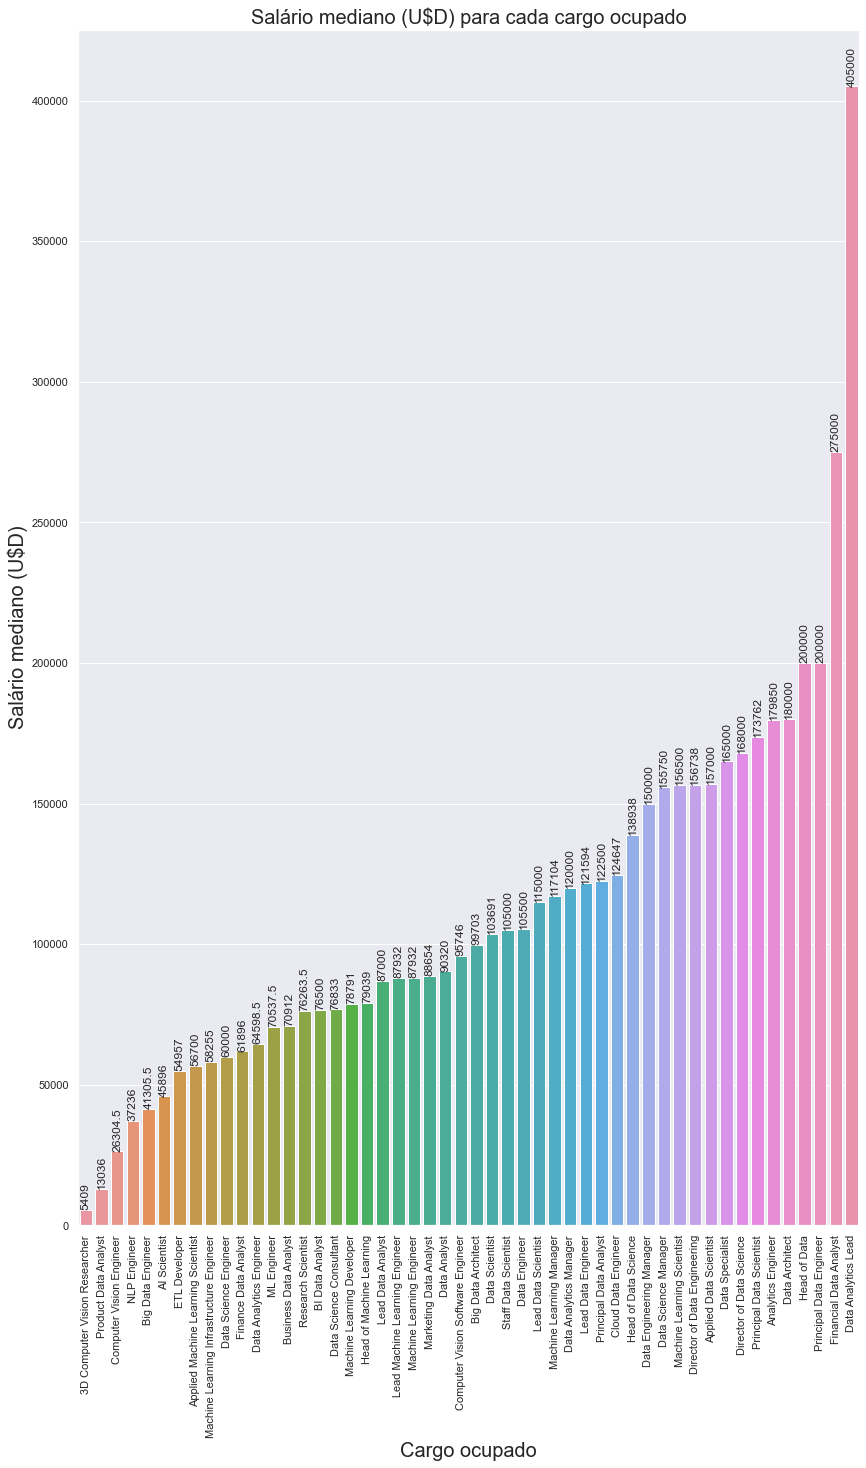

In [23]:
sns.set()
job_sal = df[['job_title', 'salary_in_usd']]
job_sal = job_sal.groupby('job_title').median()['salary_in_usd'].sort_values().reset_index()
fig = plt.figure(figsize=(14,22))
g = sns.barplot(x='job_title', y='salary_in_usd', data=job_sal, ci=None)
g.bar_label(g.containers[0], rotation=90)
plt.ylabel("Salário mediano (U$D)", size=20)
plt.xlabel("Cargo ocupado", size=20)
plt.title("Salário mediano (U$D) para cada cargo ocupado", size=20)
plt.xticks(rotation=90)

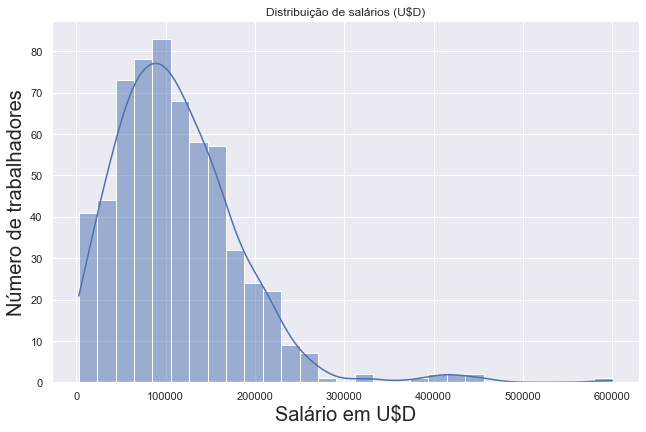

In [24]:
g = sns.displot(x=df['salary_in_usd'], data=df, kde=True)
plt.title('Distribuição de salários (U$D)')
plt.xlabel('Salário em U$D', size=20)
plt.ylabel('Número de trabalhadores', size=20)
g.fig.set_figwidth(10)
g.fig.set_figheight(6)

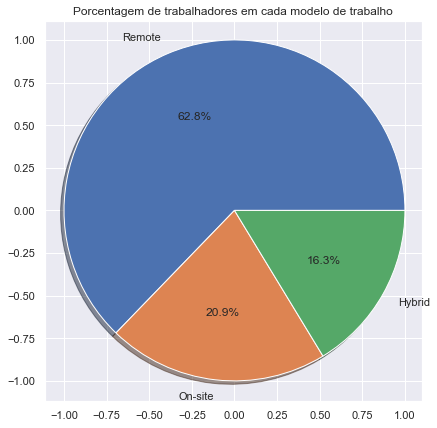

In [25]:
ratio = np.array(df['remote_ratio'].value_counts())

labels = ['Remote', 'On-site', 'Hybrid']

plt.figure(figsize=(7,7))
plt.pie(ratio, labels=labels, autopct='%1.1f%%', shadow=True, frame=True)
plt.title('Porcentagem de trabalhadores em cada modelo de trabalho')
plt.show()

<AxesSubplot:>

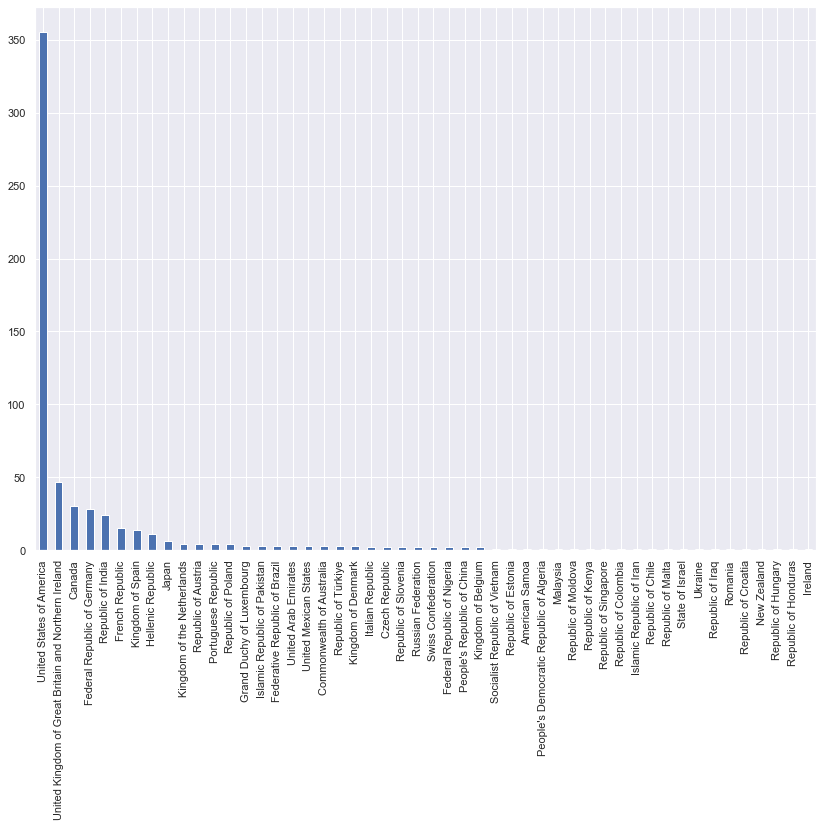

In [26]:
location = df.company_location.value_counts()
location.plot.bar(figsize=(14,10))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 [Text(0, 0, 'Socialist Republic of Vietnam'),
  Text(1, 0, 'Islamic Republic of Iran'),
  Text(2, 0, 'Republic of Kenya'),
  Text(3, 0, 'Islamic Republic of Pakistan'),
  Text(4, 0, 'Ukraine'),
  Text(5, 0, 'Republic of Moldova'),
  Text(6, 0, 'American Samoa'),
  Text(7, 0, 'Federative Republic of Brazil'),
  Text(8, 0, 'Republic of Honduras'),
  Text(9, 0, 'Republic of Türkiye'),
  Text(10, 0, 'Republic of Colombia'),
  Text(11, 0, 'Republic of India'),
  Text(12, 0, 'Republic of Malta'),
  Text(13, 0, 'Federal Republic of Nigeria'),
  Text(14, 0, 'Republic of Estonia'),
  Text(15, 0, 'United Mexican States'),
  Text(16, 0, 'Republic of Hungary'),
  Text(17, 0, 'Italian Republic'),
  Text(18, 0, 'Malaysia'),
  Text(19, 0, 'Republic of Chile'),
  Text(20, 0, 'Re

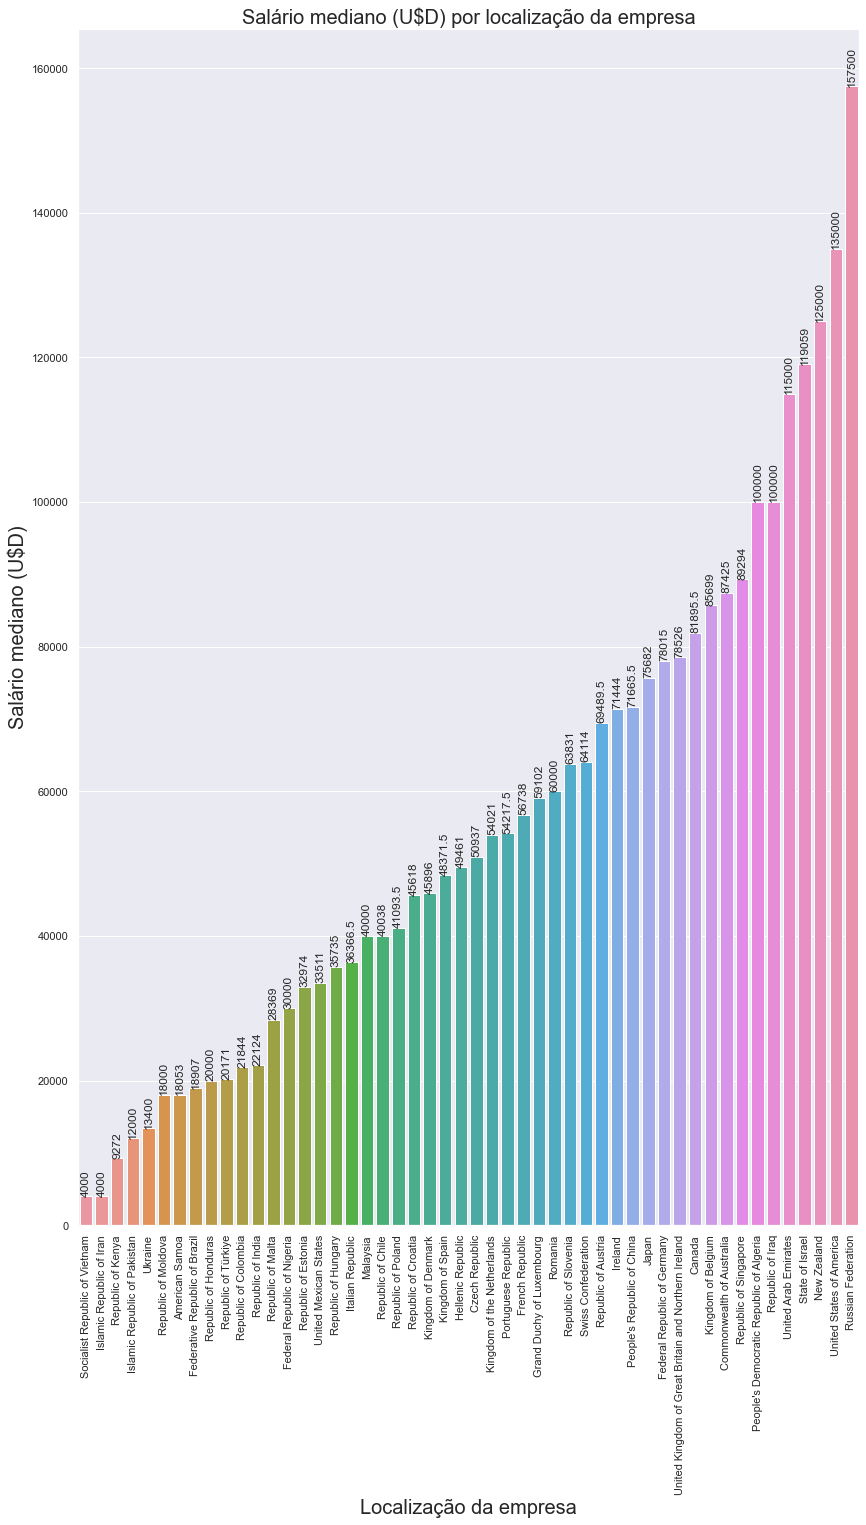

In [27]:
sns.set()
location_sal = df[['company_location', 'salary_in_usd']]
location_sal = location_sal.groupby('company_location').median()['salary_in_usd'].sort_values().reset_index()
fig = plt.figure(figsize=(14,22))
g = sns.barplot(x='company_location', y='salary_in_usd', data=location_sal, ci=None)
g.bar_label(g.containers[0], rotation=90)
plt.ylabel('Salário mediano (U$D)', size=20)
plt.xlabel('Localização da empresa', size=20)
plt.title('Salário mediano (U$D) por localização da empresa', size=20)
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Salário mediano (U$D) por tamanho da empresa')

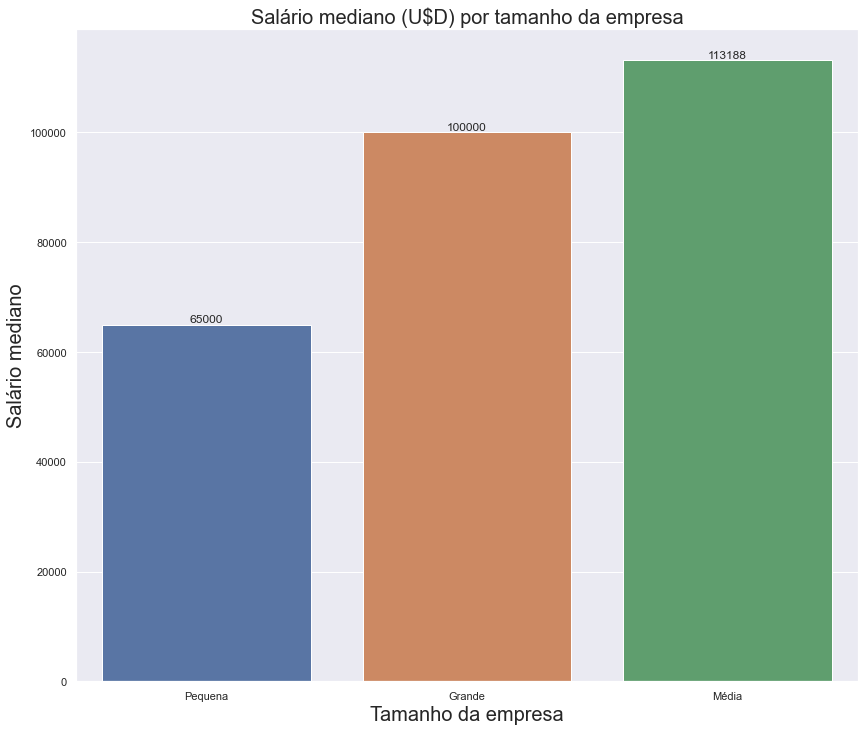

In [28]:
sns.set()
size_sal = df[['company_size', 'salary_in_usd']]
size_sal = size_sal.groupby('company_size').median()['salary_in_usd'].sort_values().reset_index()
fig = plt.figure(figsize=(14,12))
g = sns.barplot(x='company_size', y='salary_in_usd', data=size_sal, ci=None)
g.bar_label(g.containers[0], rotation=0)
plt.ylabel('Salário mediano', size=20)
plt.xlabel('Tamanho da empresa', size=20)
plt.xticks(rotation=0)
plt.title('Salário mediano (U$D) por tamanho da empresa', size=20)